In [1]:
import matplotlib.pyplot as plt

import wandb

In [2]:
api = wandb.Api()

In [4]:
run_with_trans = api.run("pufanyi/sc4001/0js1pr83")
run_without_trans = api.run("pufanyi/sc4001/1q4lk7zi")

In [ ]:
train_loss_with_trans = run_with_trans.history(keys=["train/loss"])
train_loss_without_trans = run_without_trans.history(keys=["train/loss"])
eval_loss_with_trans = run_with_trans.history(keys=["eval/loss"])
eval_loss_without_trans = run_without_trans.history(keys=["eval/loss"])

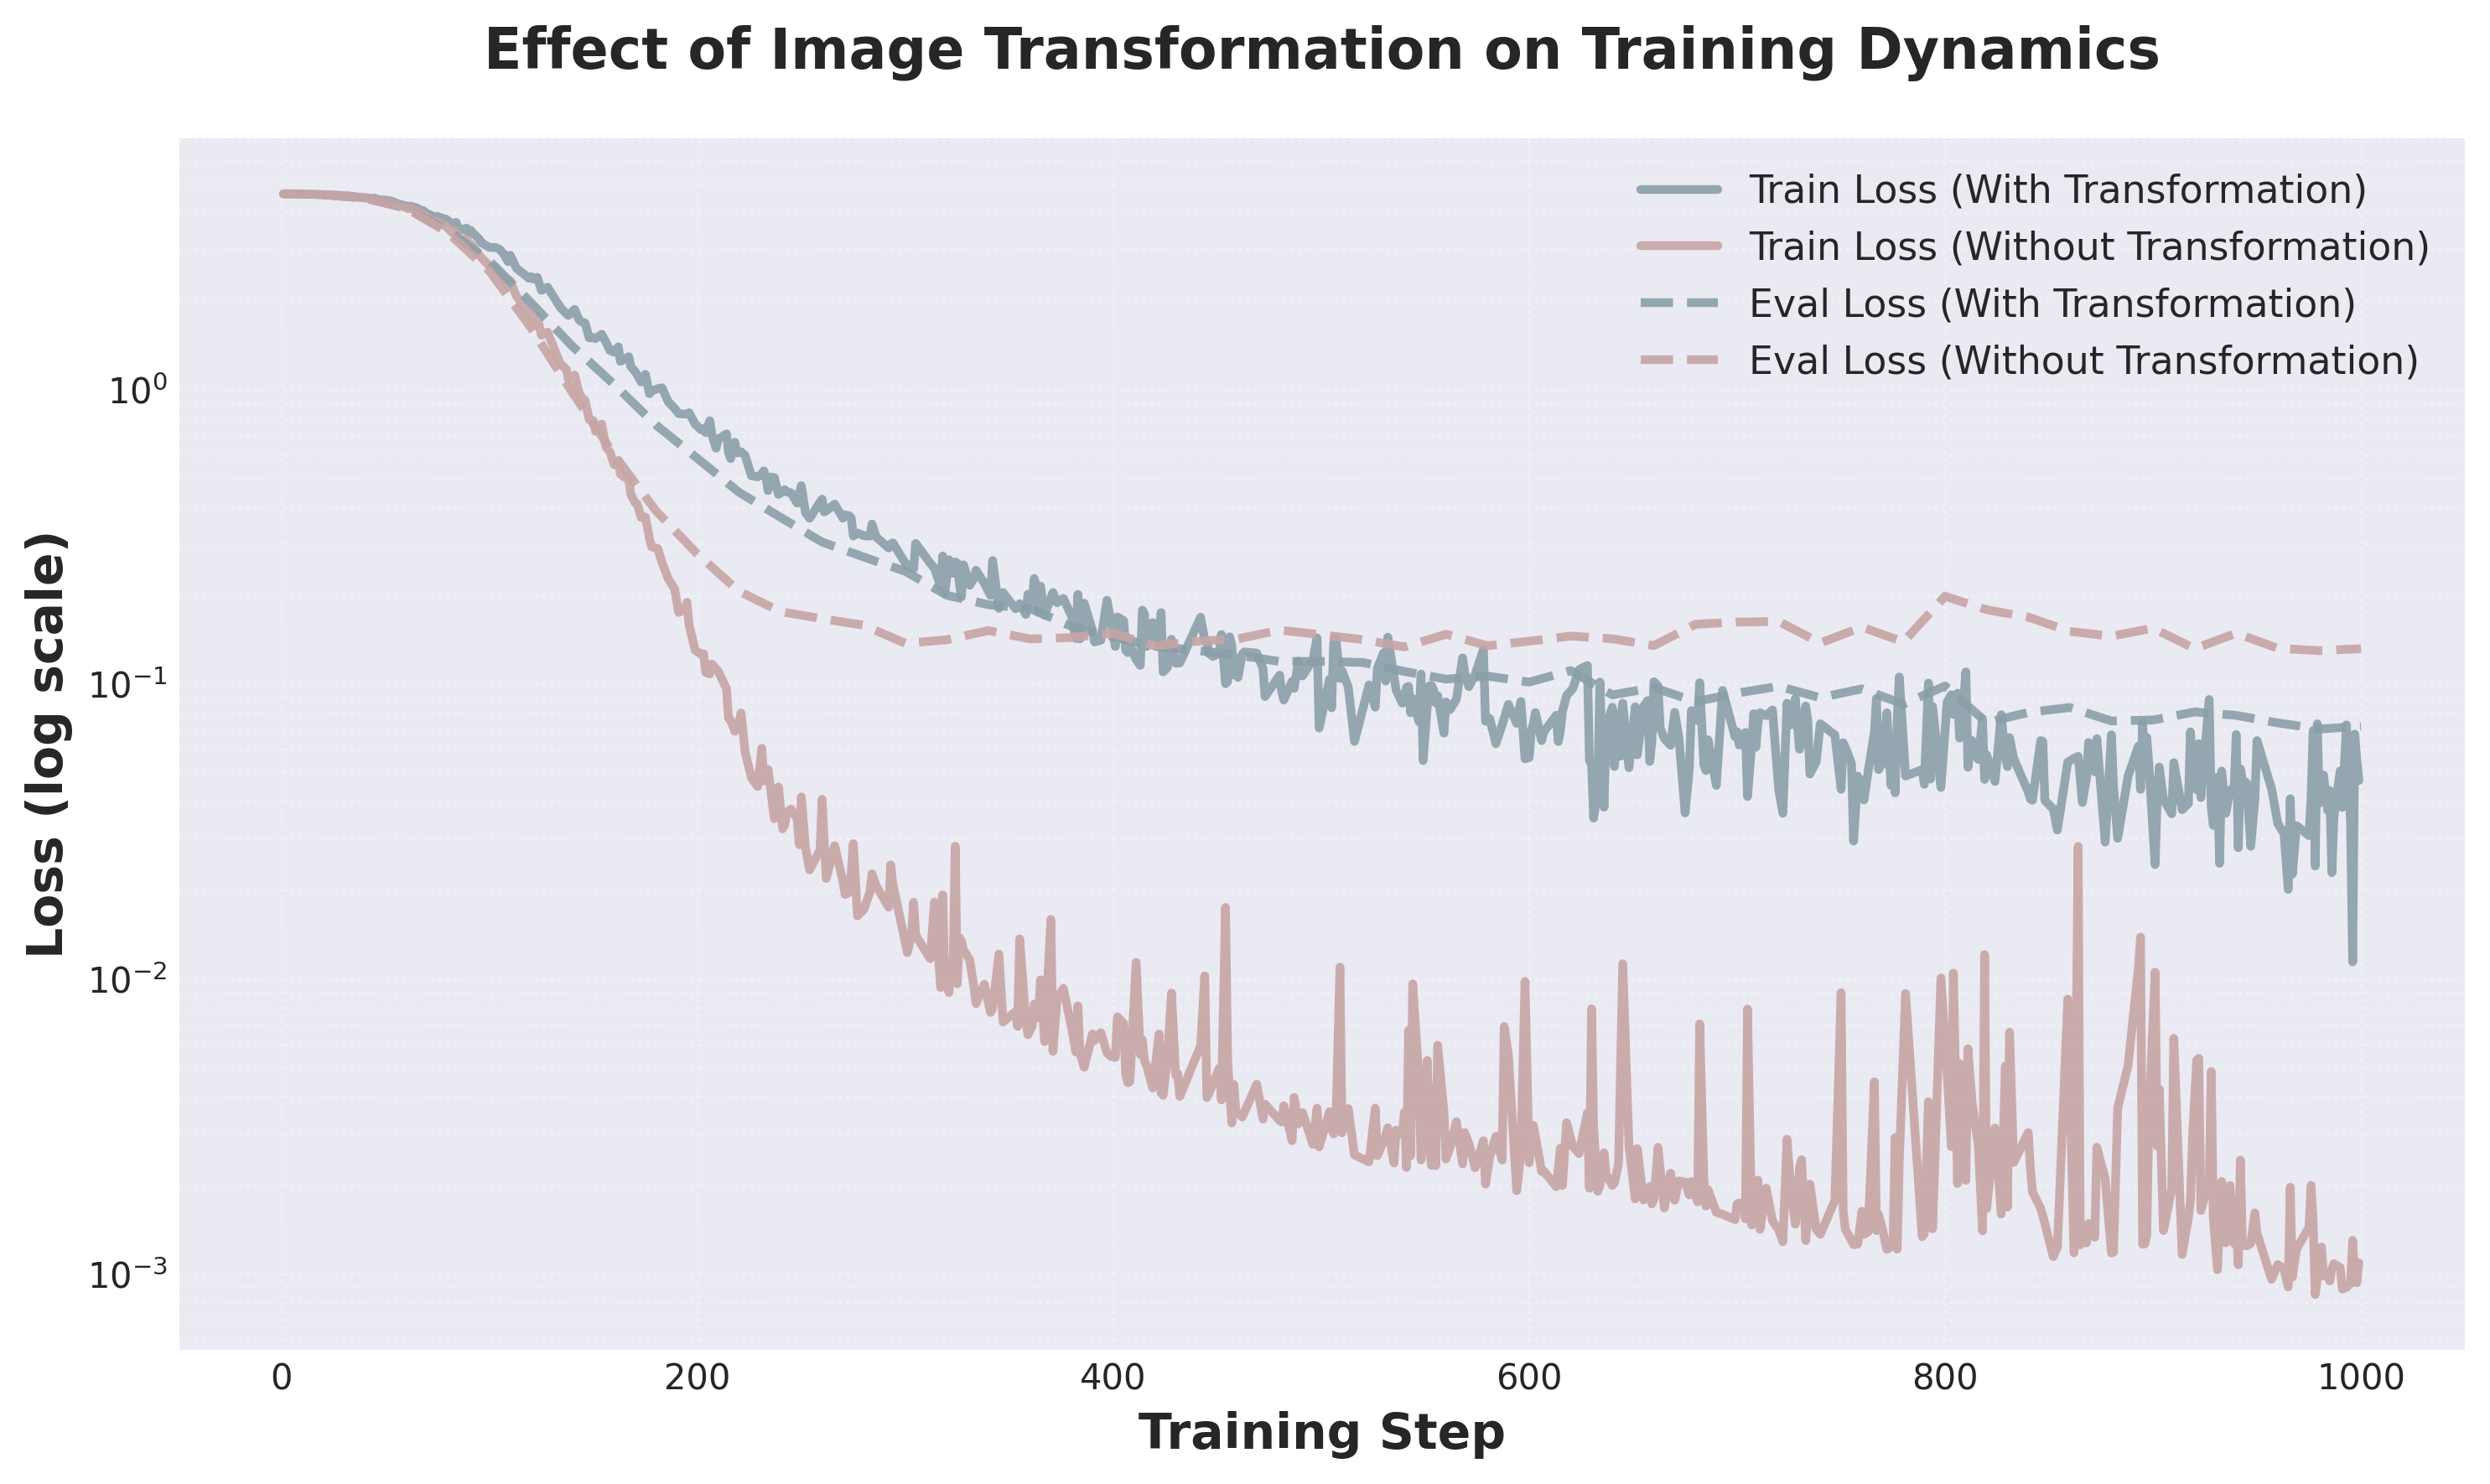

Figure saved as 'loss_curves_morandi.png' and 'loss_curves_morandi.pdf'


In [8]:
# Morandi color palette (muted, elegant colors)
colors = {
    "with_trans": "#8B9FA8",  # Dusty blue
    "without_trans": "#C7A5A5",  # Dusty rose
}

# Set up the plot with paper-quality settings
plt.figure(figsize=(10, 6), dpi=300)
plt.style.use("seaborn-v0_8-darkgrid")

# Plot training losses (solid lines)
plt.plot(
    train_loss_with_trans["_step"],
    train_loss_with_trans["train/loss"],
    color=colors["with_trans"],
    linewidth=2.5,
    linestyle="-",
    label="Train Loss (With Transformation)",
    alpha=0.9,
)

plt.plot(
    train_loss_without_trans["_step"],
    train_loss_without_trans["train/loss"],
    color=colors["without_trans"],
    linewidth=2.5,
    linestyle="-",
    label="Train Loss (Without Transformation)",
    alpha=0.9,
)

# Plot evaluation losses (dashed lines, slightly darker)
plt.plot(
    eval_loss_with_trans["_step"],
    eval_loss_with_trans["eval/loss"],
    color=colors["with_trans"],
    linewidth=2.5,
    linestyle="--",
    label="Eval Loss (With Transformation)",
    alpha=0.9,
)

plt.plot(
    eval_loss_without_trans["_step"],
    eval_loss_without_trans["eval/loss"],
    color=colors["without_trans"],
    linewidth=2.5,
    linestyle="--",
    label="Eval Loss (Without Transformation)",
    alpha=0.9,
)

# Apply log scale to y-axis for better visualization
plt.yscale("log")

# Customize the plot for paper quality
plt.xlabel("Training Step", fontsize=14, fontweight="bold")
plt.ylabel("Loss (log scale)", fontsize=14, fontweight="bold")
plt.title(
    "Effect of Image Transformation on Training Dynamics",
    fontsize=16,
    fontweight="bold",
    pad=20,
)

# Legend with better positioning
plt.legend(
    loc="upper right", fontsize=11, framealpha=0.95, edgecolor="gray", fancybox=True
)

# Grid for better readability
plt.grid(True, alpha=0.3, linestyle=":", linewidth=0.8, which="both")

# Tight layout for better spacing
plt.tight_layout()

# Save the figure in high quality
plt.savefig(
    "loss_curves_morandi.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
)
plt.savefig(
    "loss_curves_morandi.pdf", bbox_inches="tight", facecolor="white", edgecolor="none"
)

plt.show()

print("Figure saved as 'loss_curves_morandi.png' and 'loss_curves_morandi.pdf'")